In [1]:
!pip install xgboost seaborn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load data

In [3]:
df = pd.read_csv('Salary Data.csv')
print(df.head())
print(df.info())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary

# Cleaning and preprocessing the date

In [4]:
df.dropna(inplace=True)# Drop missing values

df_encoded = pd.get_dummies(df, drop_first=True)# One-hot encode categorical variables

# Define features and target
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Model

In [6]:
# Random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [7]:
# XGboost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation

In [8]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xgb_pred)



Random Forest
MAE: 9714.666666666666
R² Score: 0.8989615742525804

XGBoost
MAE: 10372.430416666666
R² Score: 0.8845554249375016


# Visualization

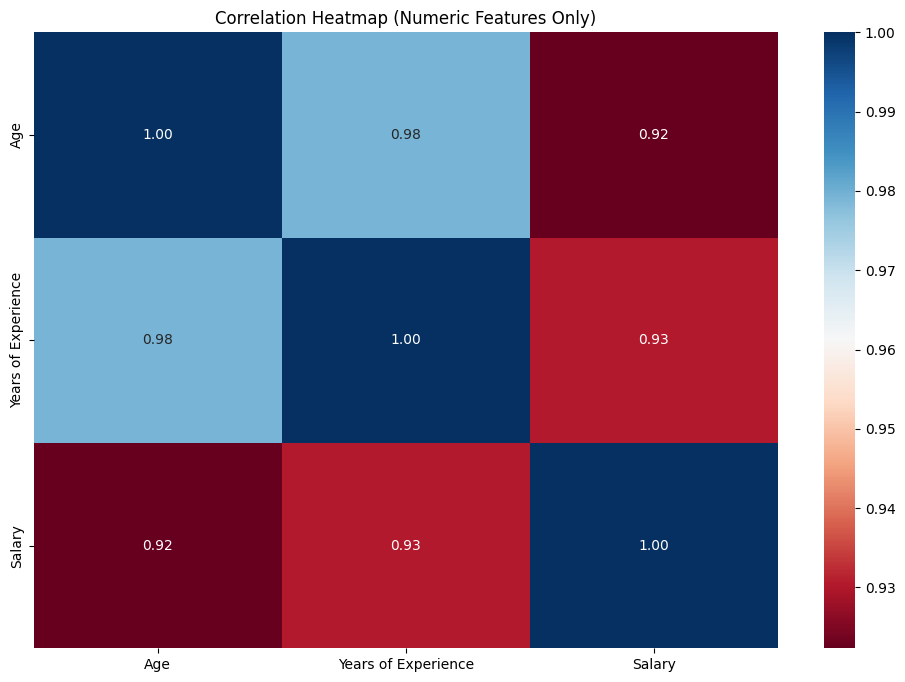

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features )")
plt.show()


/tmp/ipython-input-11-964320528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_salary.values, y=correlation_with_salary.index, palette='coolwarm')


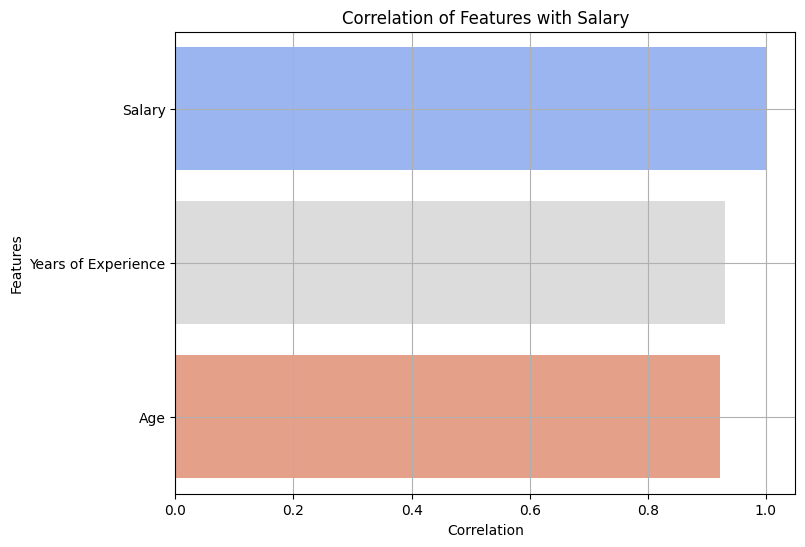

In [11]:
numeric_df = df_encoded.select_dtypes(include=np.number)

# Correlation of all features with Salary
correlation_with_salary = numeric_df.corr()['Salary'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_salary.values, y=correlation_with_salary.index, palette='coolwarm')
plt.title("Correlation of Features with Salary")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.grid(True)
plt.show()


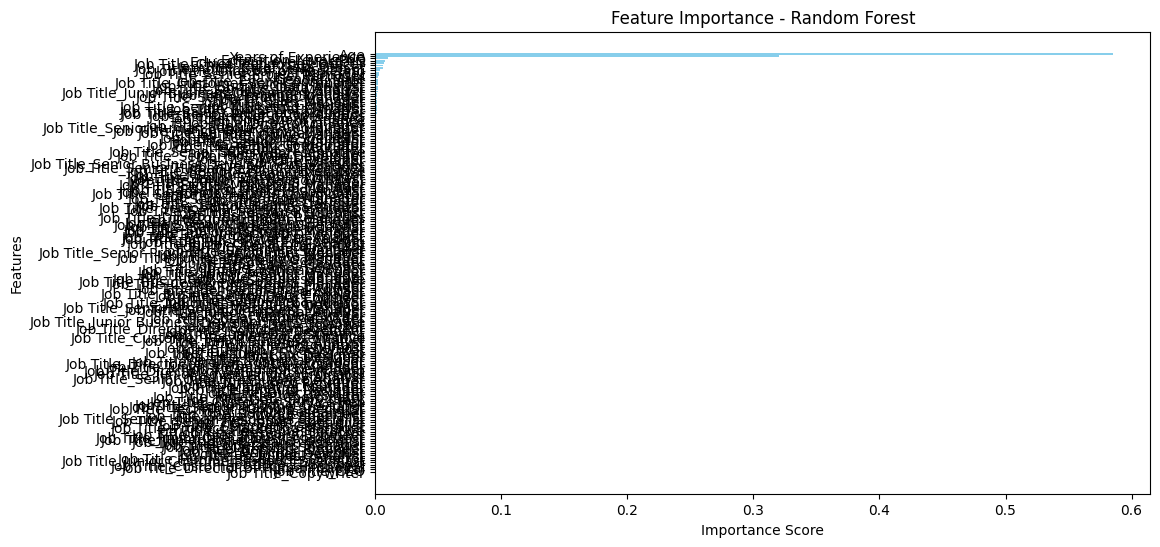

In [14]:
# Feature Importance (Random Forest)
rf_importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(rf_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), rf_importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

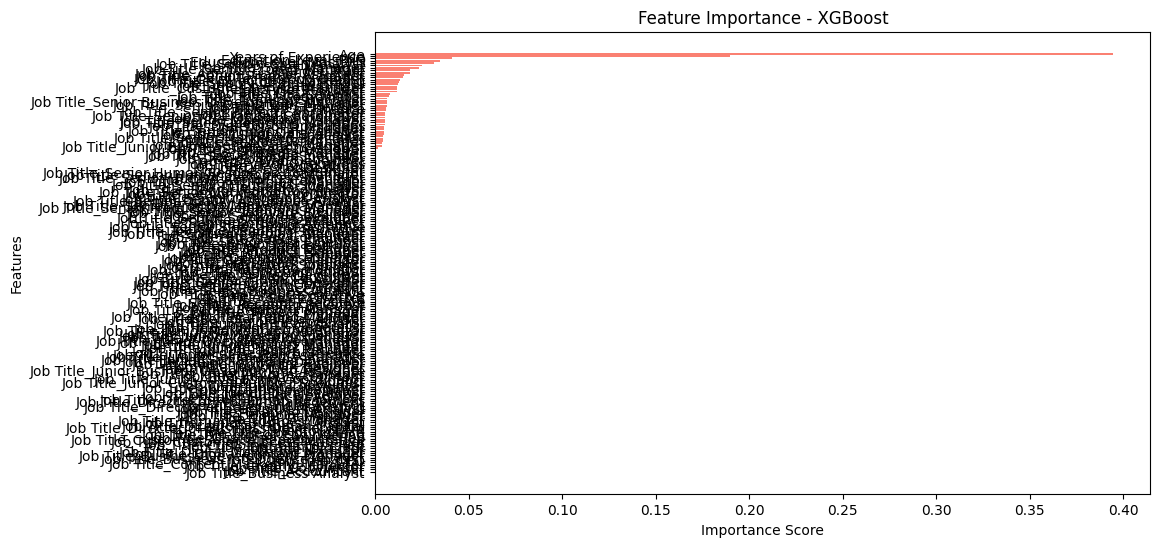

In [15]:
# Feature Importance (XGBoost)
xgb_importances = xgb_model.feature_importances_
indices = np.argsort(xgb_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), xgb_importances[indices], align='center', color='salmon')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


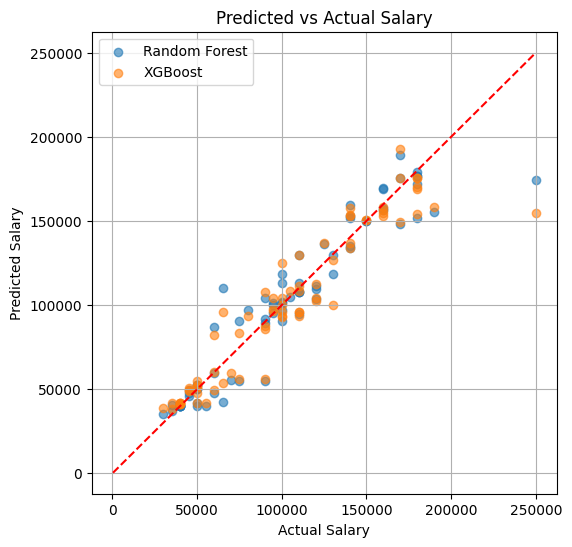

In [16]:
# Predicted vs Actual – Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, label='Random Forest', alpha=0.6)
plt.scatter(y_test, xgb_pred, label='XGBoost', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salary")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-17-1178150017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae, palette='Blues')
/tmp/ipython-input-17-1178150017.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2, palette='Greens')


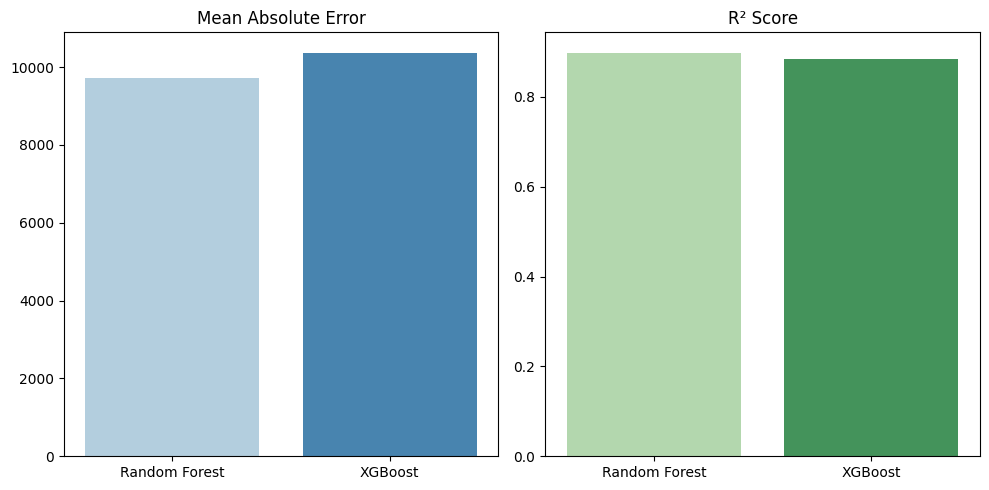

In [17]:
# MAE and R² Score Comparison
mae = [mean_absolute_error(y_test, rf_pred), mean_absolute_error(y_test, xgb_pred)]
r2 = [r2_score(y_test, rf_pred), r2_score(y_test, xgb_pred)]
models = ['Random Forest', 'XGBoost']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x=models, y=mae, palette='Blues')
plt.title("Mean Absolute Error")

plt.subplot(1,2,2)
sns.barplot(x=models, y=r2, palette='Greens')
plt.title("R² Score")

plt.tight_layout()
plt.show()


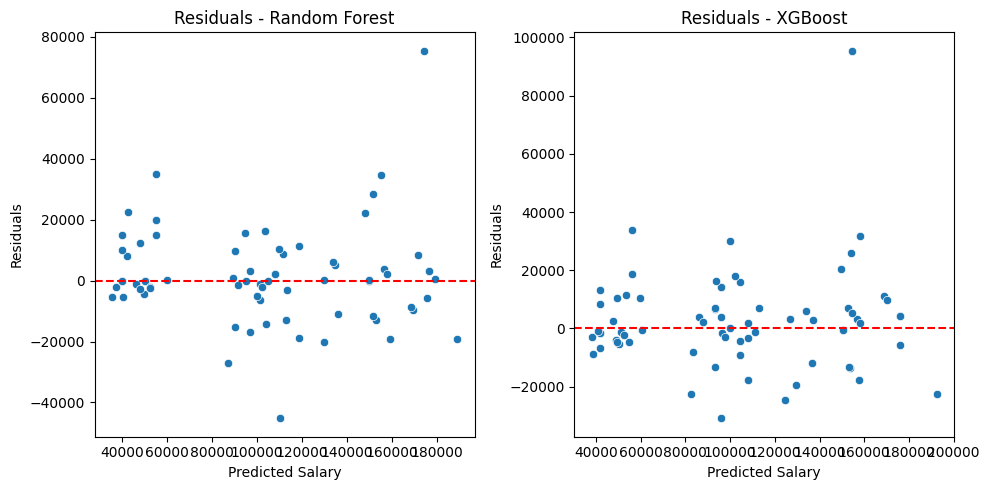

In [18]:
# Residuals Plot
residuals_rf = y_test - rf_pred
residuals_xgb = y_test - xgb_pred

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=rf_pred, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals - Random Forest")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
sns.scatterplot(x=xgb_pred, y=residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals - XGBoost")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

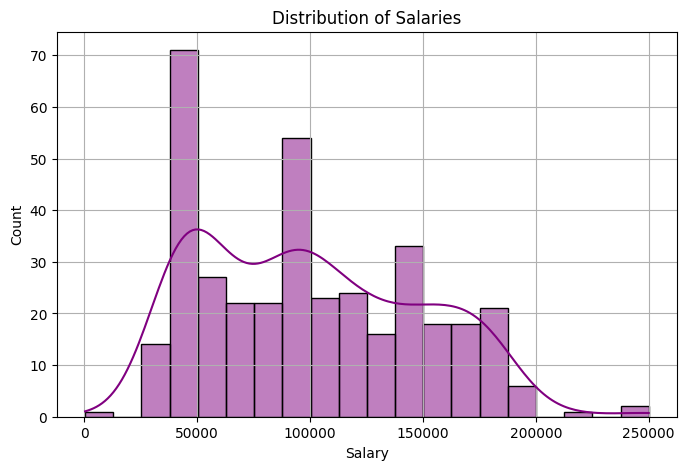

In [19]:
# Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], kde=True, bins=20, color='purple')
plt.title("Distribution of Salaries")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.grid(True)
plt.show()